In [30]:
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")

In [31]:
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import numpy as np

model = read_sbml_model("../model/Rpom_05.xml")


https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http

In [32]:
dmsp_reactions = [
    "DIMETHYLPROPIOTHETIN-DETHIOMETHYLASE-RXN",
    "RXN-21753",
    "RXN-6383",
    "RXN-9087",
    "RXN-9736",
    "RXN-12571",
    "RXN-12572",
    "RXN-12573",
]

for reaction in dmsp_reactions:
    try:
        rxn = model.reactions.get_by_id(reaction)
        print(f"{rxn.id}: {rxn.reaction}")
        print(f"\t{rxn.gene_reaction_rule}")
    except KeyError:
        print(f"{reaction} not found in model.")
        continue

DIMETHYLPROPIOTHETIN-DETHIOMETHYLASE-RXN: SS-DIMETHYL-BETA-PROPIOTHETIN[c] --> ACRYLATE[c] + CPD-7670[c] + PROTON[c]
	SPO0453 or SPO1596 or SPO1703 or SPO2299
RXN-21753: ACRYLATE[c] + ATP[c] + CO-A[c] --> ACRYLYL-COA[c] + AMP[c] + PPI[c]
	SPO_RS14880
RXN-6383: 3-HYDROXY-PROPIONYL-COA[c] <=> ACRYLYL-COA[c] + WATER[c]
	
RXN-9087: ACRYLYL-COA[c] + NADPH[c] + PROTON[c] --> NADP[c] + PROPIONYL-COA[c]
	SPO_RS09715
RXN-9736: SS-DIMETHYL-BETA-PROPIOTHETIN[c] + THF-GLU-N[c] --> 5-METHYL-THF-GLU-N[c] + CPD-7672[c] + PROTON[c]
	
RXN-12571: ATP[c] + CO-A[c] + CPD-7672[c] --> AMP[c] + CPD-13546[c] + PPI[c]
	SPO2045
RXN-12572: CPD-13546[c] + ETF-Oxidized[c] + PROTON[c] --> CPD-13547[c] + ETF-Reduced[c]
	SPO3804
RXN-12573: CPD-13547[c] + 2.0 WATER[c] --> ACETALD[c] + CARBON-DIOXIDE[c] + CO-A[c] + CPD-7671[c]
	SPO3805


In [33]:
from cobra.flux_analysis.reaction import assess

EX_dmsp = model.reactions.get_by_id("EX_SS-DIMETHYL-BETA-PROPIOTHETIN")
biomass = model.reactions.get_by_id("Rpom_hwa_biomass")

dmsp_e = model.metabolites.get_by_id("SS-DIMETHYL-BETA-PROPIOTHETIN[e]")

with model:
    EX_dmsp.lower_bound = -10

    # # Add DMS sink
    # sk = model.add_boundary(
    #     model.metabolites.get_by_id("CPD-7670[c]"),
    #     type="sink"
    # )

    sol = model.optimize()

    assessment = assess(model, model.reactions.get_by_id("RXN-9087"))

sol

,fluxes,reduced_costs
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,0.046088,-5.551115e-17
1.1.1.178-RXN,0.000000,-5.252266e-02
1.1.1.262-RXN,0.000000,0.000000e+00
1.1.1.39-RXN,0.000000,-7.488208e-16
1.1.1.8-RXN,0.000000,1.442131e-15
...,...,...
RXN-19296,0.000000,-2.834317e-17
RXN-9106,0.000000,-2.402912e+00
RXN0-5258-Yeast,0.000000,-8.753777e-03
RXN-19301,0.000000,-2.275982e-01


In [34]:
for rxn in model.metabolites.get_by_id("PROPIONYL-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.reaction}")

print("================================")

for rxn in model.metabolites.get_by_id("D-METHYL-MALONYL-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.reaction}")

print("================================")

for rxn in model.metabolites.get_by_id("METHYL-MALONYL-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.reaction}")

print("================================")

for rxn in model.metabolites.get_by_id("SUC-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.reaction}")

1.2.1.27-RXN: CO-A[c] + CPD-12179[c] + NAD[c] + WATER[c] <=> HCO3[c] + NADH[c] + PROPIONYL-COA[c] + PROTON[c]
PROPIONYL-COA-CARBOXY-RXN: ATP[c] + HCO3[c] + PROPIONYL-COA[c] <=> ADP[c] + D-METHYL-MALONYL-COA[c] + PROTON[c] + Pi[c]
RXN-12561: CO-A[c] + CPD-13534[c] --> ACETYL-COA[c] + PROPIONYL-COA[c]
KETOBUTFORMLY-RXN: 2-OXOBUTANOATE[c] + CO-A[c] --> FORMATE[c] + PROPIONYL-COA[c]
RXN-19805: PROPIONYL-COA[c] + SUC-COA[c] <-- CO-A[c] + CPD-21420[c]
RXN-11213: CH3-MALONATE-S-ALD[c] + CO-A[c] + NAD[c] + WATER[c] --> HCO3[c] + NADH[c] + PROPIONYL-COA[c] + PROTON[c]
RXN-8961: CPD-9409[c] --> GLYOX[c] + PROPIONYL-COA[c]
RXN-12736: CO-A[c] + CPD-665[c] + NAD[c] --> NADH[c] + PROPIONYL-COA[c] + PROTON[c]
RXN0-268: PROPIONYL-COA[c] + SUC[c] --> PROPIONATE[c] + SUC-COA[c]
PROPIONATE--COA-LIGASE-RXN: ATP[c] + CO-A[c] + PROPIONATE[c] --> AMP[c] + PPI[c] + PROPIONYL-COA[c]
METHYLACETOACETYLCOATHIOL-RXN: 2-METHYL-ACETO-ACETYL-COA[c] + CO-A[c] <=> ACETYL-COA[c] + PROPIONYL-COA[c]
RXN-9087: ACRYLYL-COA[

In [35]:
# Try setting objective to sink

with model:
    EX_dmsp.upper_bound = 10

    # Add sodium sink
    model.add_boundary(
        model.metabolites.get_by_id("NA+[c]"),
        type="sink"
    )

    # Add DMS sink
    model.add_boundary(
        model.metabolites.get_by_id("CPD-7670[c]"),
        type="sink"
    )

    # Set succinyl-CoA sink
    sk = model.add_boundary(
        model.metabolites.get_by_id("ACRYLATE[c]"),
        type="sink",
        reaction_id="...",
    )
    model.objective = sk

    sol = model.optimize()

sol

,fluxes,reduced_costs
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,0.000000e+00,3.155444e-30
1.1.1.178-RXN,0.000000e+00,-1.824241e-30
1.1.1.262-RXN,0.000000e+00,-1.023872e-29
1.1.1.39-RXN,0.000000e+00,0.000000e+00
1.1.1.8-RXN,0.000000e+00,-2.329567e-15
...,...,...
RXN0-5258-Yeast,0.000000e+00,1.620189e-15
RXN-19301,0.000000e+00,9.860761e-31
GLYC3PDEHYDROG-RXN,-7.537529e-15,0.000000e+00
SK_NA+[c],0.000000e+00,0.000000e+00


# Valine, Glutamate, P-AMINO-BENZOATE

In [45]:
model.metabolites.get_by_id("VAL[c]").reactions

frozenset({<Reaction BRANCHED-CHAINAMINOTRANSFERVAL-RXN at 0x7fd831446c90>,
           <Reaction PROTEIN-RXN at 0x7fd830ce5ac0>})

In [37]:
model.reactions.get_by_id('BRANCHED-CHAINAMINOTRANSFERVAL-RXN')

Reaction identifier,BRANCHED-CHAINAMINOTRANSFERVAL-RXN
Name,BRANCHED-CHAINAMINOTRANSFERVAL-RXN
Memory address,0x7fd831446c90
Stoichiometry,2-KETO-ISOVALERATE[c] + GLT[c] --> 2-KETOGLUTARATE[c] + VAL[c] 3-methyl-2-oxobutanoate + L-glutamate --> 2-oxoglutarate + L-valine
GPR,G1RHL-3164 or SPO0253
Lower bound,0.0
Upper bound,1000.0


No wonder we can't grow on valine! But see this pathway on biocyc: 

https://biocyc.org/pathway?orgid=RUEGERIA_POMEROYI_DSS3&id=VALDEG-PWY&detail-level=2

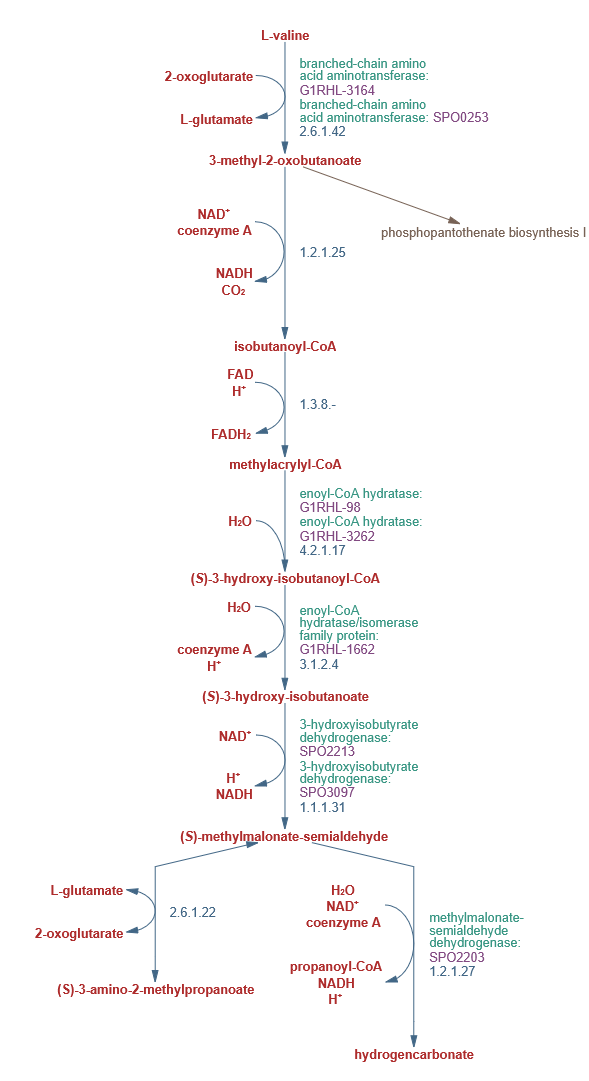

In [38]:
# First step is BRANCHED-CHAINAMINOTRANSFERVAL-RXN, which in the model is irreversible.
# See if making it reversible allows growth:

with model:
    model.reactions.get_by_id('BRANCHED-CHAINAMINOTRANSFERVAL-RXN').bounds = (-1000, 1000)

    # For now, supply free valine
    dmd = model.add_boundary(
        model.metabolites.get_by_id("VAL[c]"),
        type="demand",
        reaction_id="EX_VAL"
    )
    dmd.bounds = (-10, 0)

    sol = model.optimize()
sol

,fluxes,reduced_costs
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,5.306283e-02,0.000000e+00
1.1.1.178-RXN,-3.519160e-14,2.604028e-12
1.1.1.262-RXN,0.000000e+00,0.000000e+00
1.1.1.39-RXN,0.000000e+00,4.757384e-11
1.1.1.8-RXN,9.808305e-02,0.000000e+00
...,...,...
RXN-9106,0.000000e+00,-1.387779e-17
RXN0-5258-Yeast,0.000000e+00,0.000000e+00
RXN-19301,0.000000e+00,2.645453e-17
GLYC3PDEHYDROG-RXN,0.000000e+00,0.000000e+00


In [18]:
model.genes.get_by_id("G1RHL-98")

Gene identifier,G1RHL-98
Name,G_G1RHL__45__98
Memory address,0x7fd832ef6300
Functional,True
In 28 reaction(s),"RXN-17780, TIGLYLCOA-HYDROXY-RXN, RXN-16135, RXN-16558, ENOYL-COA-HYDRAT-RXN-POLYMER-INST-L-3-HYDROXYACYL-COA-C14-H28//POLYMER-INST-TRANS-D2-ENOYL-COA-C14-H28/WATER.88., RXN-12567, RXN-19802,..."


Glutamate

In [48]:
glt_e = model.metabolites.get_by_id("GLT[e]")
ex_glt = model.reactions.get_by_id("EX_glt")

In [52]:
# Missing transporter - using predicted glutamate/glutamine/aspartate/asparagine ABC transporter
# genes: SPO0519, SPO0520, SPO0521, SPO0522

from cobra.core import Metabolite, Reaction

with model:
    glt_tpp = Reaction(
        id="ABC-13-RXN",
        name="",
        lower_bound=0,
        upper_bound=1000,
        subsystem="",
    )
    glt_tpp.add_metabolites({
        model.metabolites.get_by_id("GLT[e]"): -1,
        model.metabolites.get_by_id("GLT[c]"): 1,
        model.metabolites.get_by_id("ATP[c]") : -2.0,
        model.metabolites.get_by_id("WATER[c]") : -2.0,
        model.metabolites.get_by_id("ADP[c]") : 2.0,
        model.metabolites.get_by_id("Pi[c]") : 2.0,
        model.metabolites.get_by_id("PROTON[c]") : 2.0
    })
    model.add_reactions([glt_tpp])

    # Bound and check for growth!
    ex_glt.lower_bound = -10
    sol = model.optimize()
sol

,fluxes,reduced_costs
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,5.244706e-02,1.110223e-16
1.1.1.178-RXN,-8.763929e-20,-1.300071e-13
1.1.1.262-RXN,0.000000e+00,0.000000e+00
1.1.1.39-RXN,4.664967e-04,-3.034795e-13
1.1.1.8-RXN,9.694485e-02,5.551115e-17
...,...,...
RXN-9106,0.000000e+00,-3.816392e-16
RXN0-5258-Yeast,0.000000e+00,0.000000e+00
RXN-19301,0.000000e+00,0.000000e+00
GLYC3PDEHYDROG-RXN,0.000000e+00,0.000000e+00


In [75]:
[rxn for rxn in model.reactions if "//" in rxn.id]

[<Reaction 1.4.1.21-RXN-L-ASPARTATE/NAD/WATER//OXALACETIC_ACID/AMMONIUM/NADH/PROTON.60. at 0x7fd831556c60>,
 <Reaction 1.4.1.21-RXN-L-ASPARTATE/NADP/WATER//OXALACETIC_ACID/AMMONIUM/NADPH/PROTON.62. at 0x7fd831557050>,
 <Reaction 1.5.5.1-RXN-ETF-Reduced/UBIQUINONE-10//ETF-Oxidized/CPD-9958/PROTON.56. at 0x7fd831557b60>,
 <Reaction 1.6.99.5-RXN-NADH/UBIQUINONE-10/PROTON//NAD/CPD-9958.40. at 0x7fd831569250>,
 <Reaction 1TRANSKETO-RXN-D-SEDOHEPTULOSE-7-P/GAP//CPD-15318/XYLULOSE-5-PHOSPHATE.56. at 0x7fd831569e50>,
 <Reaction 1TRANSKETO-RXN-D-SEDOHEPTULOSE-7-P/GAP//CPD-15895/XYLULOSE-5-PHOSPHATE.56. at 0x7fd83156a2d0>,
 <Reaction 1TRANSKETO-RXN-D-SEDOHEPTULOSE-7-P/GAP//CPD-16551/XYLULOSE-5-PHOSPHATE.56. at 0x7fd83156a660>,
 <Reaction 2.6.1.57-RXN-PHE/2-KETOGLUTARATE//PHENYL-PYRUVATE/GLT.41. at 0x7fd83157ebd0>,
 <Reaction 2.7.1.156-RXN-ITP/ADENOSYLCOBINAMIDE//ADENOSYLCOBINAMIDE-P/IDP/PROTON.56. at 0x7fd83157f260>,
 <Reaction 5.4.2.10-RXN-CPD-13469//GLUCOSAMINE-1P.26. at 0x7fd8313c3a10>,
 <Rea

In [71]:
# Check if glutamine/aspartate/asparagine are also missing transporters
for met in ["GLN", "L-ASPARTATE", "ASN"]:
    print(model.metabolites.get_by_id(f"{met}[p]").reactions)

frozenset()
frozenset()
frozenset()


## P-AMINO-BENZOATE[e]

In [57]:
for rxn in model.metabolites.get_by_id("P-AMINO-BENZOATE[c]").reactions:
    print(f"{rxn.id}:\n\t{rxn.reaction}")

H2PTEROATESYNTH-RXN:
	DIHYDROPTERIN-CH2OH-PP[c] + P-AMINO-BENZOATE[c] --> 7-8-DIHYDROPTEROATE[c] + PPI[c]
RXN-14291:
	ALL-TRANS-HEXAPRENYL-DIPHOSPHATE[c] + P-AMINO-BENZOATE[c] <=> CPD-15190[c] + PPI[c]
ADCLY-RXN:
	4-AMINO-4-DEOXYCHORISMATE[c] --> P-AMINO-BENZOATE[c] + PROTON[c] + PYRUVATE[c]


In [58]:
# Can R pom grow on free 4-aminobenzoate?

with model:
    # Create free demand
    dmd = model.add_boundary(
        model.metabolites.get_by_id("P-AMINO-BENZOATE[c]"),
        type="demand",
        reaction_id="EX_P-AMINO-BENZOATE"
    )
    dmd.bounds = (-10, 0)
    
    sol = model.optimize()
sol

,fluxes,reduced_costs
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN,0.0,-1.110223e-16
1.1.1.178-RXN,0.0,-3.554198e-02
1.1.1.262-RXN,0.0,-2.814397e-18
1.1.1.39-RXN,0.0,-3.301775e-14
1.1.1.8-RXN,0.0,-5.923663e-03
...,...,...
RXN-9106,0.0,0.000000e+00
RXN0-5258-Yeast,0.0,-1.387779e-17
RXN-19301,0.0,0.000000e+00
GLYC3PDEHYDROG-RXN,0.0,0.000000e+00
